In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

# sns.set_style(style='white')
# sns.set_context(context ='paper')

pd.set_option('max_columns',50)
pd.set_option('max_rows',500)

font_path = 'c:/Windows/Fonts/NanumSquareRoundR.ttf'
fontprop = font_manager.FontProperties(fname=font_path)

## data from kosis
- 대상 범위 : 2017년 5월 16일 현재 전국 25,704 표본가구 내 상주하는 만 13세 이상인 자

#### 1. 환경문제에 대한 인식(미세먼지 유입, 13세 이상 인구)

#### 2. 미세먼지 인식도(시도)


In [2]:
man = pd.read_csv('data/man.csv')
woman = pd.read_csv('data/woman.csv', encoding = 'euc-kr')

region = pd.read_csv('data/region.csv')

## 미세먼지에 대한 남녀 의견
- 전국
- 나이별 남녀 비교

In [3]:
man

,Unnamed: 0,전혀 불안하지 않음,별로 불안하지 않음,보통,약간 불안함,매우 불안함
0,13~19세,2.1,5.1,19.2,37.0,36.7
1,20∼29세,1.1,4.0,15.9,38.2,40.8
2,30∼39세,0.6*,3.5,11.8,36.8,47.3
3,40∼49세,0.8,3.8,13.4,37.5,44.5
4,50∼59세,0.5,4.2,14.5,43.2,37.5
5,60세 이상,0.8,5.8,15.4,41.4,36.5
6,65세 이상,0.9,6.5,16.0,41.2,35.4


In [4]:
woman

,Unnamed: 0,전혀 불안하지 않음,별로 불안하지 않음,보통,약간 불안함,매우 불안함
0,13~19세,0.4*,4.1,12.3,36.5,46.7
1,20∼29세,0.4*,2.3,10.6,31.3,55.4
2,30∼39세,0.3*,2.1,7.9,28.2,61.6
3,40∼49세,0.3*,2.3,9.2,34.2,53.9
4,50∼59세,0.5*,3.2,11.1,37.8,47.5
5,60세 이상,0.6,5.5,15.4,39.6,38.9
6,65세 이상,0.6,6.2,16.2,41.1,36.0


- 전혀 불안하지 않음	별로 불안하지 않음	보통	약간 불안함	매우 불안함
- 여기서 매우 불안함 시각화

### 매우 불안함 비율 (남녀 나이대별)

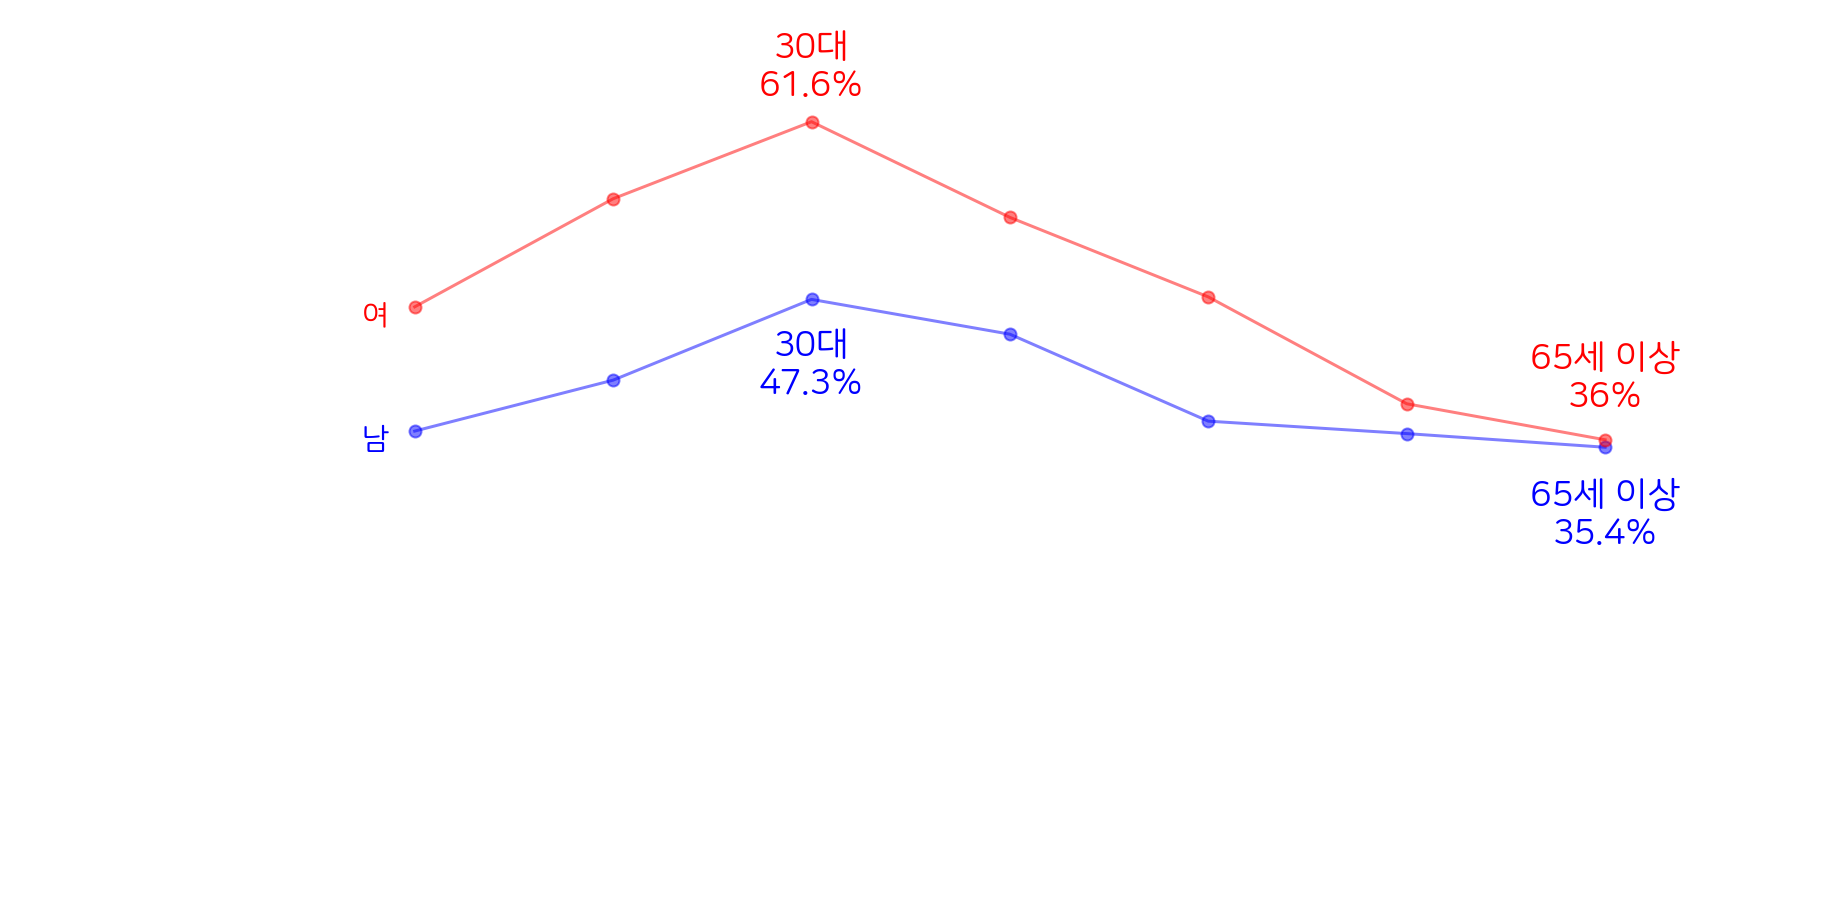

In [9]:
plt.figure(figsize=(16,8))
man['매우 불안함'].plot(color='b',alpha=0.5,marker = 'o')
woman['매우 불안함'].plot(color='r',alpha=0.5, marker = 'o')

sns.despine(left = True, bottom = True)

plt.ylim([0,70])
plt.xlim([-2,7])

plt.yticks([])
plt.xticks([])

plt.text(-0.2,36,'남',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop, fontsize = 15, color = 'b')
plt.text(-0.2,46,'여',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop,fontsize = 15, color = 'r')

plt.text(2,66,'30대\n61.6%',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop, fontsize = 18,color='r')
plt.text(2,42,'30대\n47.3%',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop,fontsize = 18,color='b')

plt.text(6,41,'65세 이상\n36%',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop, fontsize = 18,color='r')
plt.text(6,30,'65세 이상\n35.4%',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop,fontsize = 18,color='b')


fig = plt.gcf()
plt.show()
fig.savefig('나이대별남녀비율.png',transparent=True)

### 매우 불안함 남녀 전체

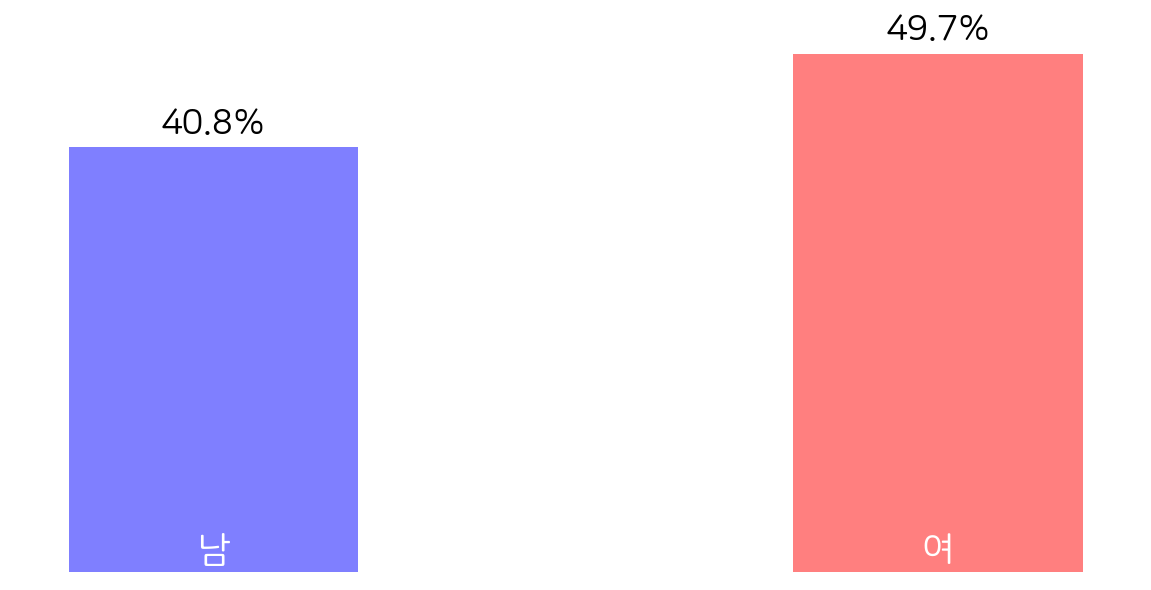

In [10]:
# 여기 수치는 테이블이 아닌 kosis에서 바로 찾아서 작성
plt.figure(figsize=(10,5))

plt.bar(0.5, 40.8,color='b',alpha=0.5,width=0.2)
plt.bar(1, 49.7,color='r',alpha=0.5,width=0.2)

sns.despine(bottom = True, left = True)

plt.yticks([])
plt.xticks([])

plt.text(0.5,43,'40.8%',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize = 18)
plt.text(1,52,'49.7%',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize=18)

plt.text(0.5,2,'남',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize = 18, color = 'white')
plt.text(1,2,'여',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize=18, color = 'white')

fig = plt.gcf()
plt.show()
fig.savefig('비율차이.png',transparent=True)

## 미세먼지에 대한 남녀 의견
- 지역별 남녀 비교
- 매우 불안함 비율 차이 (여성 - 남성)

In [11]:
region_woman = region[lambda x : x['Unnamed: 0']== '여자'].reset_index()
region_man = region[lambda x : x['Unnamed: 0']== '남자'].reset_index()

In [12]:
deference = region_woman['매우 불안함'] - region_man['매우 불안함']

In [13]:
d = {'지역' : region_woman.지역, '차이' : deference}
df = pd.DataFrame(d)

In [14]:
df = df[1:]

In [15]:
df = df.sort_values('차이', ascending = False).reset_index(drop = True)

In [16]:
df

,지역,차이
0,경기,12.1
1,대구,11.7
2,세종,11.1
3,대전,10.7
4,서울,9.6
5,인천,9.5
6,광주,7.4
7,울산,7.3
8,전북,6.7
9,충남,6.7


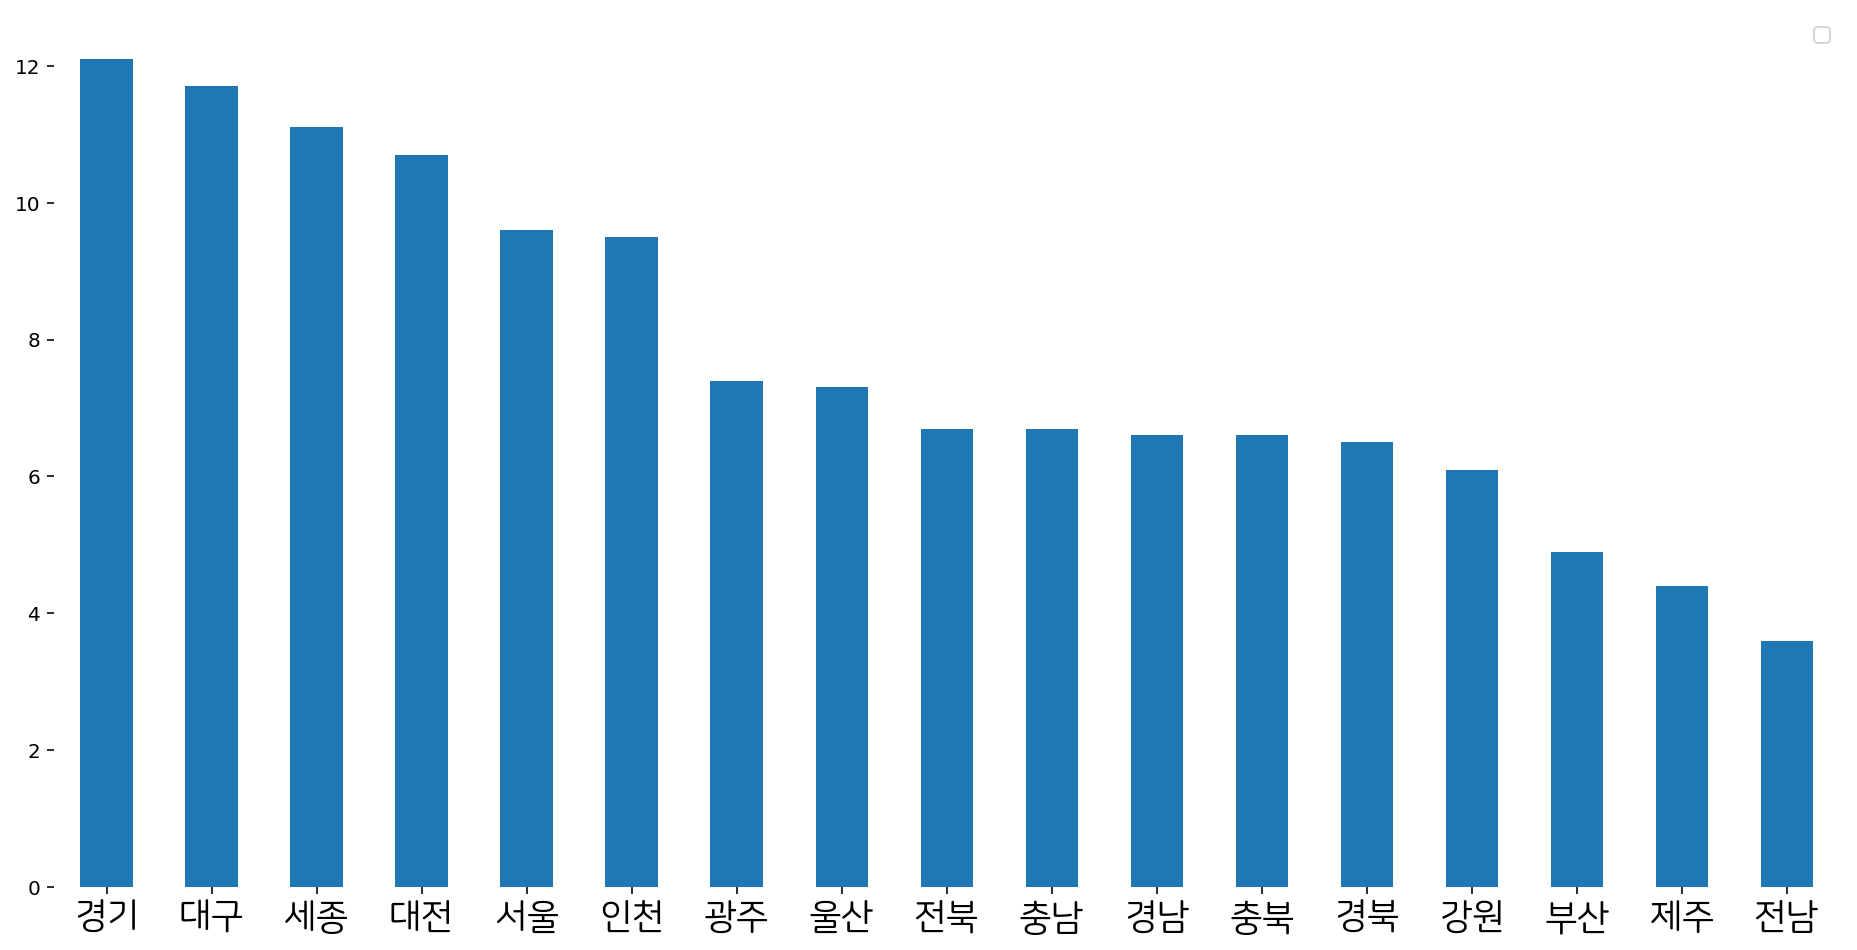

In [17]:
ax = df.plot.bar(figsize = (16,8))

sns.despine(left = True, bottom = True)

ax.set_xticklabels(df.지역, fontproperties = fontprop, fontsize = 18, rotation = 0)

plt.legend([])
plt.show()

In [18]:
colors = ['0.3','0.3','0.3','0.3','0.3','0.3','0.3','0.3','0.6', '0.6', '0.6', '0.6', '0.6', '0.6','0.3','0.3', '0.6']

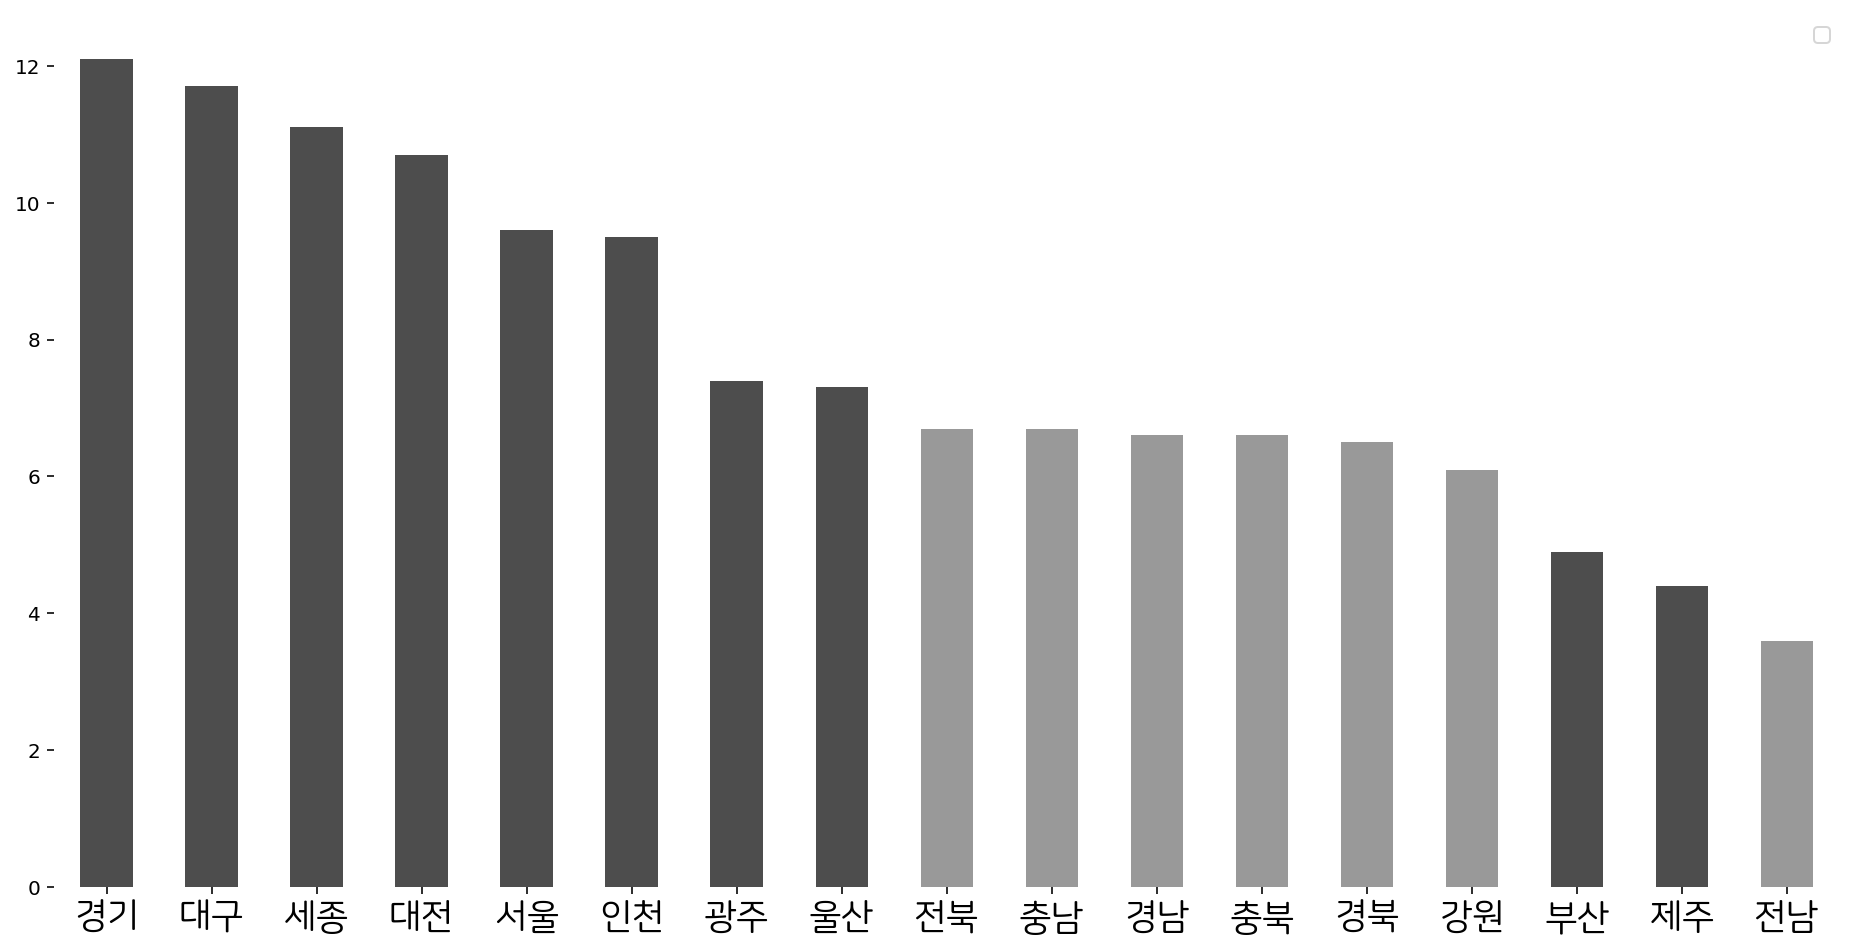

In [19]:
ax = df.plot.bar(figsize = (16,8),color = [colors])

sns.despine(left = True, bottom = True)

ax.set_xticklabels(df.지역, fontproperties = fontprop, fontsize = 18, rotation = 0)

plt.legend([])

fig = plt.gcf()
plt.show()
fig.savefig('지역별.png',transparent=True)